In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import threading

import copy

In [2]:
from IPython.display import clear_output
%matplotlib inline
import time

In [ ]:
class Environment:
    def __init__(self, grid_size=100, n_goals=10):
        self.grid_size = grid_size
        self.n_goals = n_goals
        # state is a 2D numpy array representing the grid
        self.map =  np.zeros((grid_size, grid_size))
        self.goal_positions = np.random.randint(0, grid_size, (n_goals, 2))
        for (i,j) in self.goal_positions:
            self.map[i, j] = 5
        self.map_with_positions = copy.deepcopy(self.map)
        self.map_exploration = copy.deepcopy(self.map)
        self.map_pheromore =  np.zeros((grid_size, grid_size))
        #self._lock = threading.Lock()

    def reset(self):
        self.map = np.zeros((100, 100))
        for (i,j) in self.goal_positions:
            self.map[i, j] = 5

    def update_map(self, position, pheromone=0):
        #with self._lock:
            x, y = position
            if 0 <= x < self.grid_size and 0 <= y < self.grid_size:
                self.map_pheromore[x, y] =+ pheromone
                self.map_with_positions[x, y] =+ -1
                self.map_exploration[x, y] = 1

    def render(self):
        clear_output(wait=True)
        # create the heatmap
        plt.imshow(self.map, cmap='hot', interpolation='nearest')
        plt.show();
        
    def close(self):
        pass

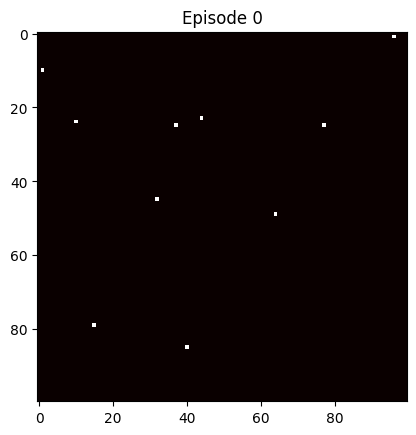

In [17]:
%matplotlib inline
env = Environment(grid_size=100, n_goals=10)
env.render()

In [ ]:
# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor

In [ ]:
class Ant:
    def __init__(self):
        

    
